# Gradients and Gradient Descent

The [gradient of a function](https://en.wikipedia.org/wiki/Gradient) is a multivariate derivate with a crucial property -- the gradient points in the direction of the greatest rate of increase of the function. Many physical processes can be modeled by gradient and gradient flows, such as the flow of water down a mountain and the movement of charged particles in electromagnetic potentials. Dealing with such problems is hence very well established.

As data scientists we use gradient descent to maximize or minimize various functions. For example, to find a good model fit we could attempt to minimize a loss function by following the gradient through many iterations in parameter-space. Let's take a close look.

If we want to minimize a multivariate function $f(\mathbf{a})$ -- typically a function of our parameters $\mathbf{a} = (a_1, \ldots, a_n)$ computed on our dataset -- we start with a guess $\mathbf{a}_1$ and compute the next step using the gradient, denoted by $\nabla f$:

$$ \mathbf{a}_2 = \mathbf{a}_1 - \lambda \nabla f(\mathbf{a}_1)$$

Note the differences in notation carefully -- bold face indicates a vector of parameters. The variable $\lambda$ is a parameter that controls the step size and is sometimes called the _learning rate_. Essentially we are taking a local linear approximation to our function, stepping a small bit in the direction of greatest change, and computing a new linear approximation to the function. We repeat the process until we converge to a minimum:

$$ \mathbf{a}_{n+1} = \mathbf{a}_n - \lambda \nabla f(\mathbf{a}_n)$$

This is the _gradient descent_ algorithm. It is used for a variety of machine learning models including some that you will learn about soon, such as support vector machines and neural networks. 

To be clear gradient descent is not implemented for linear regression in the examples we have studied so far. This is because there are good linear algebra methods for solving the minimum of the loss function without needing to use an iterative process. Statsmodels and sklearn will use these linear algebra methods to find the exact solution in one step without iteration. These linear algebra methods are beyond the scope of this course but do have a look at the source code if you are curious and mathematically inclined. However other more complex machine learning processes (such as neural networks) will have loss functions that cannot be solved in this manner and require some iterative analytical process. Hence we learn about this now before diving into such algorithms from week 4 onwards. 

As a final note it is actually also possible to implement a gradient descent method for linear regression in sklearn with SGDRegressor, which you might want to do if you had a very large dataset for example (the stochastic gradient descent in that implementation uses a subset of the training set in order to speed up the implementation of the algorithm). This would be unusual however.

![](https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png)


In [2]:
% matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

In [3]:
# implementation of gradient descent
def gradient_descent(gradient_func, x, l=0.1):
    vector = np.array(x)
    g = gradient_func(x)
    return vector - l * np.array(gradient(x))

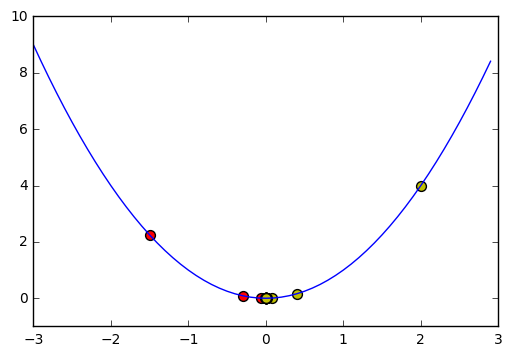

In [4]:
# Here we define a loss function which we call func, and its derivative
func=lambda x: x**2
gradient=lambda x: 2*x
xs = np.arange(-3, 3, 0.1)
ys = map(func, xs)

def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        # change l for the learning rate
        x = gradient_descent(gradient, xs[-1], l=.4)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

plt.plot(xs, ys)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=-1.5, n=20)
plt.scatter(xs2, ys2, c='r', s=50)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=2, n=20)
plt.scatter(xs2, ys2, c='y', s=50)
plt.xlim([-3,3])
plt.ylim([-1,10])
plt.show()

# wherever we start gradient descent should converge given a reasonable learning rate
# try changing the learning rate l in the iterate function to a large value like 1.1

## Some helper functions
The following functions will generate data and polynomial values.

In [5]:
# so we are optimising a two dimensional function (x**2 + y**2)/2
def function_to_optimize(x, y):
    return 0.5*(x ** 2 + y ** 2)

# the derivative of this function wrt x is x and wrt y is y
def gradient(x, y):
    f = function_to_optimize(x, y)
    return (x, y)

# x0,y0 is not a nightclub but actually our initial guesses as to the x and y that minimise the gradient
def gradient_descent(gradient_func, x0, y0, l=0.1):
    vector = np.array([x0, y0])
    g = gradient_func(x0, y0)
    return vector - l * np.array(gradient(x0, y0))

In [6]:
import numpy as np
import matplotlib.pyplot as plt

delta = 0.025

x = np.arange(-3.0, 3.01, delta)
y = np.arange(-3.0, 3.01, delta)
# this function just links the two variables together so they are indexed the same
X, Y = np.meshgrid(x, y)

# remember this is just (x**2 + y**2)/2
Z = function_to_optimize(X, Y)

print(X)
print("-----")
print(Y)
print("-----")
print(Z)

[[-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]
 [-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]
 [-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]
 ..., 
 [-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]
 [-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]
 [-3.    -2.975 -2.95  ...,  2.95   2.975  3.   ]]
-----
[[-3.    -3.    -3.    ..., -3.    -3.    -3.   ]
 [-2.975 -2.975 -2.975 ..., -2.975 -2.975 -2.975]
 [-2.95  -2.95  -2.95  ..., -2.95  -2.95  -2.95 ]
 ..., 
 [ 2.95   2.95   2.95  ...,  2.95   2.95   2.95 ]
 [ 2.975  2.975  2.975 ...,  2.975  2.975  2.975]
 [ 3.     3.     3.    ...,  3.     3.     3.   ]]
-----
[[ 9.         8.9253125  8.85125   ...,  8.85125    8.9253125  9.       ]
 [ 8.9253125  8.850625   8.7765625 ...,  8.7765625  8.850625   8.9253125]
 [ 8.85125    8.7765625  8.7025    ...,  8.7025     8.7765625  8.85125  ]
 ..., 
 [ 8.85125    8.7765625  8.7025    ...,  8.7025     8.7765625  8.85125  ]
 [ 8.9253125  8.850625   8.7765625 ...,  8.7765625  8.850625   8.9253

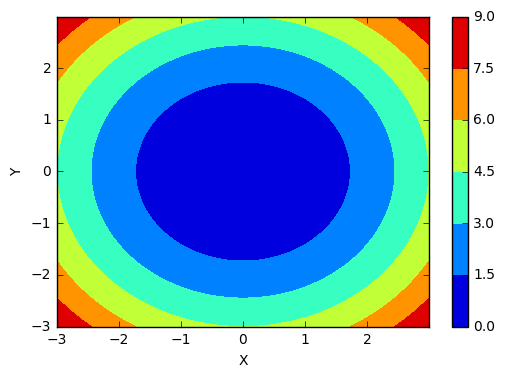

In [7]:
# to plot the values of X and Y on their respective axes, and the function Z as a third dimension of colour
CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

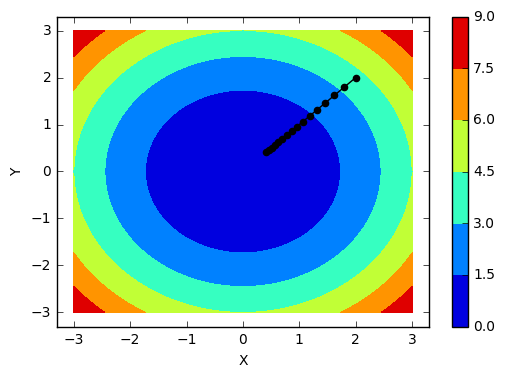

In [8]:
# as before
delta = 0.025
x = np.arange(-3.0, 3.01, delta)
y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)

# start with x0=2, y0=2
# and create 15 more steps iteratively
xs = [2]
ys = [2]
for i in range(15):
    x, y = gradient_descent(gradient, xs[-1], ys[-1])
    xs.append(x)
    ys.append(y)

# plot including the 16 points of the gradient descent
CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xs, ys, color="black")
plt.plot(xs, ys, color="black")
plt.show()

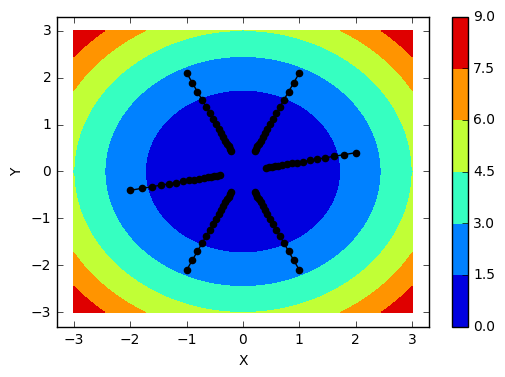

In [9]:
# multiple starting points (i.e. perform the algorithm multiple times)
delta = 0.025
x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)
CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")

for (i, j) in [(-1, 2.1), (1, 2.1), (2, 0.4), (-2, -0.4), (-1, -2.1), (1, -2.1)]:
    xs = [i]
    ys = [j]
    for i in range(15):
        x, y = gradient_descent(gradient, xs[-1], ys[-1])
        xs.append(x)
        ys.append(y)
    
    plt.scatter(xs, ys, color="black")
    plt.plot(xs, ys, color="black")

plt.show()

## Independent Practice

Let's try out some gradient descent on on single variable problems since that's a bit easier to visualise. Remember what we are dealing with is the loss function. The aim of gradient descent is to minimise the loss function. So let's imagine some loss functions that have arbitrary shapes and we will search for the minimum value.

To be clear - we are visualising the loss function of some arbitrary problem, which could bea  machine learning algorithm. Gradient descent is a general method for finding minima where some exact linear algebra solution may not exist. It is used in neural networks and support vector machines, amongst other algorithms. It is not generally used for linear regression because an exact solution can be calculated quite straightforwardly in that case (and this is what sklearn and statsmodels will implement for ordinary least squares, not a gradient descent method).

In [10]:
# implementation of gradient descent
def gradient_descent(gradient_func, x, l=0.1):
    vector = np.array(x)
    g = gradient_func(x)
    return vector - l * np.array(gradient(x))

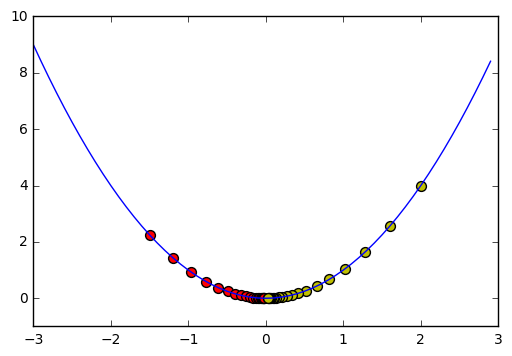

In [11]:
# Here we define a loss function which we call func, and its derivative
func=lambda x: x**2
gradient=lambda x: 2*x
xs = np.arange(-3, 3, 0.1)
ys = map(func, xs)

def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        # change l for the learning rate
        x = gradient_descent(gradient, xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

plt.plot(xs, ys)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=-1.5, n=20)
plt.scatter(xs2, ys2, c='r', s=50)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=2, n=20)
plt.scatter(xs2, ys2, c='y', s=50)
plt.xlim([-3,3])
plt.ylim([-1,10])
plt.show()

# wherever we start gradient descent should converge given a reasonable learning rate
# try changing the learning rate l in the iterate function to a large value like 1.1

## Getting stuck

As well as a poor learning rate, gradient descent could fail if there is more than one minimum.

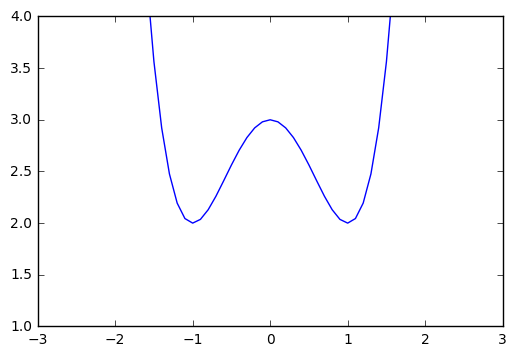

In [12]:
# This loss function has two local minima
# so what will happen??
func=lambda x: (x**4)-(2*(x**2))+3
gradient=lambda x: (4*(x**3))-(4*(x))
xs = np.arange(-5, 5, 0.1)
ys = map(func, xs)
plt.plot(xs,ys)
plt.ylim([1,4])
plt.xlim([-3,3])
plt.show()

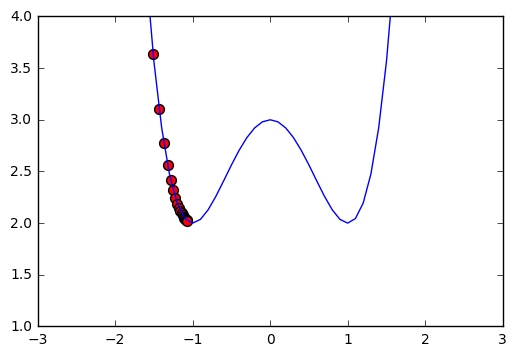

In [13]:
# try changing: the l value in iterate function will change the step size (learning rate)
# the x0 value in iterate function is the starting point, the n value is the number of steps to take
# before stopping
def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        # change l for the learning rate
        x = gradient_descent(gradient, xs[-1], l=0.01)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

plt.plot(xs, ys)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=-2, n=20)
plt.scatter(xs2, ys2, c='red', s=50)
plt.ylim([1,4])
plt.xlim([-3,3])
plt.show()

And this function:
$$f(x, y) = \begin{cases}
2 x^2 & \quad \text{if $x \leq 1$}\\
2  & \quad \text{else}
\end{cases}$$

Walk throught the following code samples.

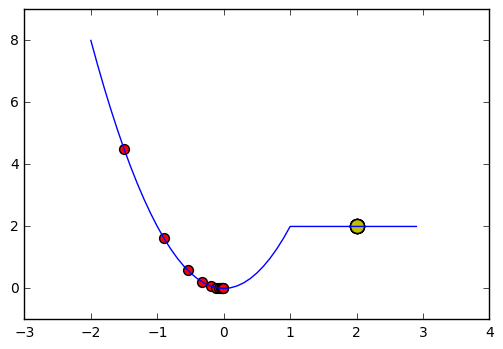

In [14]:
def func(x):
    if x <= 1:
        return 2 * x * x
    return 2

def gradient(x):
    if x <= 1:
        return 4 * x
    return 0

xs = np.arange(-2, 3, 0.1)
ys = map(func, xs)

def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        # change l for learning rate
        x = gradient_descent(gradient, xs[-1], l=0.1)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

plt.plot(xs, ys)
# change x0 for starting point, n for number of iterations
xs2, ys2 = iterate(gradient, x0=-1.5, n=10)
plt.scatter(xs2, ys2, c='r', s=50)
# change x0 for starting point, n for number of iterations
xs2, ys2 = iterate(gradient, x0=2, n=10)
plt.scatter(xs2, ys2, c='y', s=100)
plt.show()

Gradient descent works on the left half of the function but not on the right portion because the derivative is flat. Our starting point of $x=2$ never moves and doesn't converge to the center.

### Exercise

Similarly, use the function $f(x) = x^4 - 2* x^2 + x +1$ and apply gradient descent. If you need help with the derivative, you can use [Wolfram Alpha](http://www.wolframalpha.com/calculators/derivative-calculator/).

Steps:
* Plot the function and identify the two minima
* Compute the derivative
* Using gradient descent, find two starting points that converge to different minima

Questions:
* What does this tell you about the end result of gradient descent?
* What are the implications for putting gradient descent into practice?

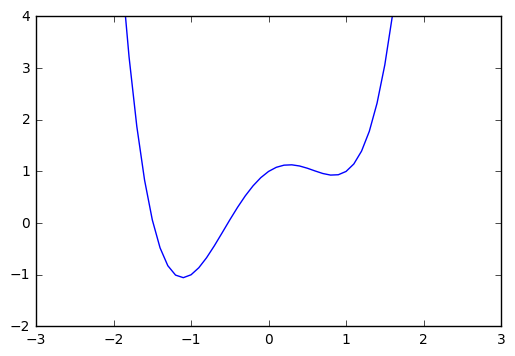

In [16]:
func=lambda x: (x**4)-(2*(x**2))+x+1
gradient=lambda x: (4*(x**3))-(2*(x))+1
xs = np.arange(-5, 5, 0.1)
ys = map(func, xs)
plt.plot(xs,ys)
plt.ylim([-2,4])
plt.xlim([-3,3])
plt.show()

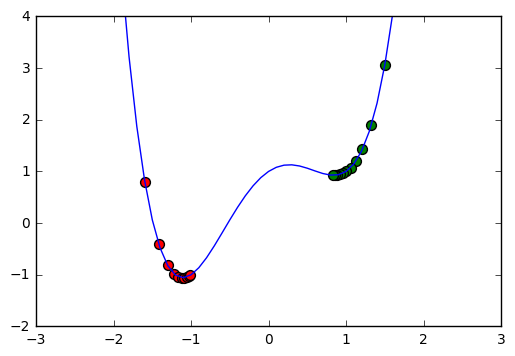

In [17]:
def iterate(gradient, x0, n=10):
    xs = [x0]
    ys = [func(x0)]
    for i in range(n):
        # change l for the learning rate
        x = gradient_descent(gradient, xs[-1], l=.015)
        xs.append(x)
        ys.append(func(x))
    return xs, ys

plt.plot(xs, ys)
# change x0 for the starting point, n for the number of iterations
xs2, ys2 = iterate(gradient, x0=-2, n=10)
plt.scatter(xs2, ys2, c='red', s=50)
xs3, ys3 = iterate(gradient, x0=1.5, n=10)
plt.scatter(xs3, ys3, c='green', s=50)
plt.ylim([-2,4])
plt.xlim([-3,3])
plt.show()

### Bonus Exercise

Use gradient descent to find the minimum of the function
$$f(x, y) = - e^{-x^2 - 4y^2}$$

In [29]:
def function_to_optimize(x, y):
    return -np.exp(-(x**2)-4*(y**2))

# the derivative of this function wrt x is x and wrt y is y
def gradient(x, y):
    x = 2 * x * np.exp(-x**2 - 4*y**2)
    y = 8 * y * np.exp(-x**2 - 4*y**2)
    return (x, y)

# x0,y0 is not a nightclub but actually our initial guesses as to the x and y that minimise the gradient
def gradient_descent(gradient_func, x0, y0, l=0.1):
    vector = np.array([x0, y0])
    g = gradient_func(x0, y0)
    return vector - l * np.array(gradient(x0, y0))

delta = 0.025

x = np.arange(-1, 1.01, delta)
y = np.arange(-1, 1.01, delta)
# this function just links the two variables together so they are indexed the same
X, Y = np.meshgrid(x, y)

# remember this is just (x**2 + y**2)/2
Z = function_to_optimize(X, Y)

#print(X)
#print("-----")
#print(Y)
#print("-----")
#print(Z)

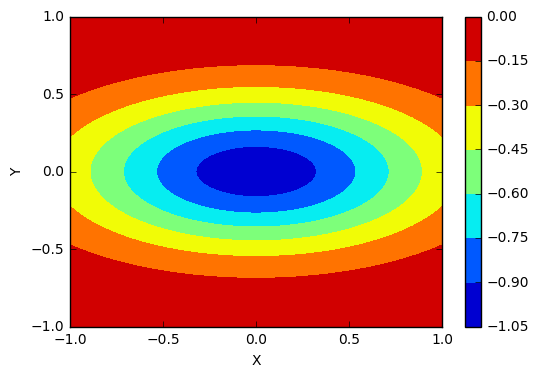

In [30]:
# to plot the values of X and Y on their respective axes, and the function Z as a third dimension of colour
CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

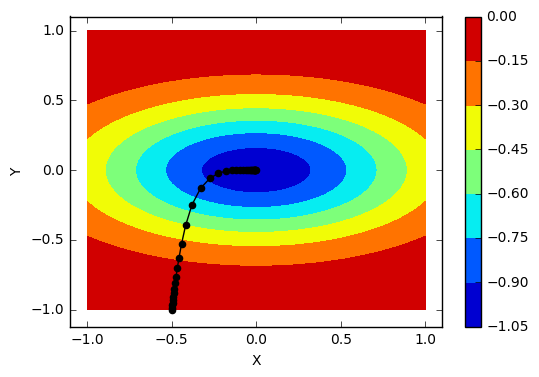

In [34]:
# as before
delta = 0.025
x = np.arange(-1, 1.01, delta)
y = np.arange(-1, 1.01, delta)
X, Y = np.meshgrid(x, y)
Z = function_to_optimize(X, Y)

# start with x0=2, y0=2
# and create 15 more steps iteratively
xs = [-.5]
ys = [-1]
for i in range(35):
    x, y = gradient_descent(gradient, xs[-1], ys[-1],l=.1)
    xs.append(x)
    ys.append(y)

# plot including the 16 points of the gradient descent
CS = plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(xs, ys, color="black")
plt.plot(xs, ys, color="black")
plt.show()